[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/juansensio/blog/blob/master/103_cfd_conservation/103_cfd_conservation.ipynb)

# Leyes de Conservación

Consideremos el caso más simple de dinámica de fluidos, en el cual queremos conocer cómo evoluciona la cantidad (en masa) de un fluido unidimensional sometido a una velocidad conocida. Si bien los fluidos unidimensional no existen en la realidad (en la que todos son tridimensionales), ésta es una buena aproximación al comportamiento de, por ejemplo, el flujo de un fluido (líquido o gaseoso) a través de una tubería. Vamos a denotar a la masa del flujo como $m$, el tiempo $t$ (y por lo tanto la evolución de la masa como $m(t)$) y la dimensión espacial como $x$. Podemos conocer la masa total de fluido integrando su densidad, $\rho$, que depende del tiempo y el espacio, $\rho(x, t)$, en todo el dominio, que empezará en $x_1$ y terminará en $x_2$, la entrada y salida de la tubería.

$$
m(t)  = \int_{x_1}^{x_2} \rho(x, t) dx
$$

Asumiendo que ni se crea ni se destruye masa (no hay, por ejemplo, reacciones nucleares), su evolución, $m(t)$, se deberá únicamente a la cantidad de fluido que esté entrando y saliendo el dominio a través de la entrada, en $x_1$, y la salida, en $x_2$ (lo que llamamos el flujo, $F$). Cualquier magnitud física que cumpla esta propiedad se conoce como una **magnitud conservativa**, y la masa es un ejemplo. 

$$
\frac{\partial}{\partial t} \int_{x_1}^{x_2} \rho(x, t) dx = F_1(t) - F_2(t)
$$

Para hacer una analogía, podemos imaginar un cubo de agua vacío. Si en un momento determinado ponemos el cubo debajo de un grifo que suelta 1 litro de agua por minuto, ¿cuántos litros de agua habrá en el cubo tras 1 minuto?, ¿y tras 2 minutos?. Muy simple, sumaremos la cantidad de agua que tenemos en el cubo (0) a la cantidad de agua que ha entrado en el cubo pasado el tiempo determinado (1 litro tras 1 minuto, 2 litros tras 2 minutos). Si tras los dos minutos hacemos un agujero en la base del cubo que pierde agua a razón de medio litro por minuto, ¿cuánta agua tendrá el cubo tras 3 minutos?. Pues $2 + 1 - 0.5 = 2.5$ litros. Para saber cómo evoluciona la cantidad de agua que tenemos, simplemente sumamos lo que entra y restamos lo que sale. 

Como puedes observar la densidad $\rho$ no es un valor concreto, si no una función del tiempo y del espacio. Esto se debe a que un fluido no es compacto, y puede acumularse en diferentes lugares en diferentes momentos dependiendo del comportamiento del mismo o la geometría del dominio (si hay un obstáculo en la tubería, por ejemplo). Así pues, nuestro objetivo será el de conocer el valor de esta densidad en cualquier lugar y momento para, de esta manera, saber si nuestra geometría es adecuada para el problema que queremos resolver. Para ello, deberemos expresar este flujo como una función de la densidad. En el caso más sencillo que estamos contemplando, esta relación es tan simple como $f(\rho(x,t)) = u(x,t)\rho(x,t)$, donde $u(x,t)$ es la velocidad del fluido (y que asumiremos es conocida).

$$
\frac{\partial}{\partial t} \int_{x_1}^{x_2} \rho(x, t) dx = f(\rho(x_1,t)) - f(\rho(x_2,t))
$$

Manipulando esta ecuación podemos derivar la siguiente ecuación diferencial

$$
\frac{\partial}{\partial t} \int_{x_1}^{x_2} \rho(x, t) dx = - \int_{x_1}^{x_2} \frac{\partial}{\partial x} f(\rho(x,t)) dx
$$

Que, reordenando, quedaría como

$$
\int_{x_1}^{x_2} \left[ \frac{\partial}{\partial t} \rho(x, t) + \frac{\partial}{\partial x} f(\rho(x,t)) \right] dx = 0
$$

Y, debido a que esta integral tiene que ser cero para todos los valores de $x_1$ y $x_2$ 

$$
\frac{\partial}{\partial t} \rho(x, t) + \frac{\partial}{\partial x} f(\rho(x,t)) = 0
$$

Esta es la formulación básica de la ecuación de **conservación de la masa**. La fórmula general para una variable conservativa cualquiera, $\phi$ se podría escribir como

$$
\frac{\partial}{\partial t} \phi(x, t) + \frac{\partial}{\partial x} f(\phi(x,t)) = 0
$$

O, de manera más compacta, simplemente

$$
\phi_t + f(\phi)_x = 0
$$

> La derivación de la ecuación de conservación asume que tanto $\phi$ como $f(\phi)$ son funciones suaves, sin embargo en el estudio de fluidos compresibles, por ejemplo, pueden aparecer discontinuidades (también llamadas ondas de choque). En esta caso, necesitaremos revisitar la formulación. 

## La ecuación de convección

Si bien podemos derivar las ecuaciones de Navier Stokes directamente a partir de las leyes de conservación para diferentes magnitudes (masa, cantidad de momento, energía, ...), primero veremos un ejemplo más sencillo con el que podremos ilustrar la mayoría de conceptos que iremos viendo en posts futuros. Este ejemplo es el de la ecuación de convección, que en su forma unidimensional se puede expresar como:

$$
\phi_t + u \phi_x = 0
$$

En este caso, la variable conservativa es $\phi(x, t)$ y el flujo es $f(\phi(x,t)) = u \phi(x, t)$ donde $u$ es la velocidad, un valor escalar constante. Esta ecuación describiría, por ejemplo, la evolución de un gas inerte en una tubería (en el cual no reacciona con su entorno, y simplemente "se deja llevar"). Considerando condiciones de contorno periódicas, esta expresión tiene la siguiente solución analítica:

$$
\phi(x,t) = \phi_0(x - ut)
$$

donde $\phi_0$ es la condición inicial. A grandes rasgos, la condición inicial se propagará en $x$ a la velocidad $u$. Esto convierte a la ecuación de convección 1D como un perfecto *benchmark* para probar diferentes métodos numéricos o cualquier idea que se nos ocurra (sorprendentemenete, y pese a la simplicidad de este ejemplo, la gran mayoría de conclusiones que saquemos usando este ejemplo se traducirán a las aplicaciones más complejas).

> Hablaremos de condiciones de contorno más adelante, por ahora simplemente mencionar que una condición de contorno periódica es una idealización en la que la entrada y salida del dominio coinciden (el dominio se pliega sobre si mismo, la entrada y la salida de la tubería se tocan).

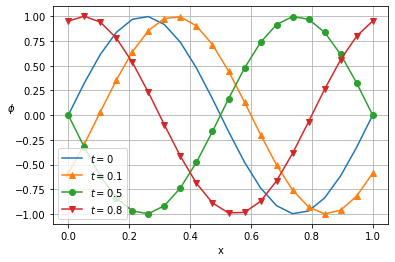

In [1]:
import numpy as np 
import matplotlib.pyplot as plt

x = np.linspace(0, 1, 20)
p = np.sin(2 * np.pi * x)

u, t = 1, 0.1
p1 = np.sin(2 * np.pi * (x - u*t)) 

u, t = 1, 0.5
p2 = np.sin(2 * np.pi * (x - u*t)) 

u, t = 1, 0.8
p3 = np.sin(2 * np.pi * (x - u*t ))

plt.plot(x, p)
plt.plot(x, p1, '^-')
plt.plot(x, p2, 'o-')
plt.plot(x, p3, 'v-')
plt.xlabel('x')
plt.ylabel('$\phi$', rotation=0)
plt.legend(['$t = 0$', '$t = 0.1$', '$t = 0.5$', '$t = 0.8$'])
plt.grid(True)
plt.show()

Si bien esta ecuación tiene solución analítica, éste no será el caso para la gran mayoría de ecuaciones de conservación que veremos más adelante, como por ejemplo las ecuaciones de Navier Stokes. En el siguiente post hablaremos sobre métodos numéricos para resolver esta misma ecuación usando técnicas que sí nos permitirán resolver ecuaciones más complejas en situaciones reales.